# Binder 01

## Initialization

In [1]:
# Loads pyKasso and other useful packages
import copy
import numpy as np
import pykasso as pk
import pykasso.visualization as pkv

In [2]:
# Creates a new project directory
project_path = 'binder_01'
pk.create_project(project_path)

In [3]:
# Constructs the settings
sks_settings = {
    'sks' : {
        'seed' : 1111,
    },
    'grid' : {
        'x0' : 0,
        'y0' : 0,
        'z0' : 50,
        'nx' : 100,
        'ny' : 100,
        'nz' : 50,
        'dx' : 10,
        'dy' : 10,
        'dz' : 10
    },
    'outlets' : {
        'number'     : 1,
        'data'       : [[994, 500]],
        'importance' : [1],
        'mode'       : 'domain_bottom',
    },
    'inlets' : {
        'number'     : 15,
        'per_outlet' : [1],
        'importance' : [1, 3, 5],
        'mode'       : 'domain_surface',
    },
}

In [4]:
# Computes the karstic networks
# for algorithm in ['Isotropic3', 'Riemann3']:
for algorithm in ['Isotropic3']:
    sks_settings['sks']['algorithm'] = algorithm
    sim = pk.SKS(sks_settings=sks_settings)
    sim.build()
    sim.compute()

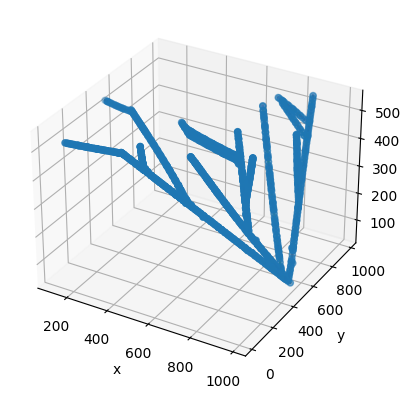

In [5]:
# Visualizes the results
v = pkv.visualizer(project_path)

v.plot3D(n_sim=0, feature='karst')

# settings = {
#     'ghosts'  : [0],
#     'outline' : True,
#     'inlets'  : True,
#     'outlets' : True,
#     'cpos'    : 'xz',
# }
# visualization.show([0, 1], ['karst'], settings=settings)
# visualization.plot2D()

## Influence of the faults

In [7]:
# Constructs the faults
faults = np.full((100,50,50), 0)
faults[:, :, 25] = 1

# Visualizes the faults
# pkv.show_array(faults)

# Updates the settings
new_settings = copy.deepcopy(sks_settings)
new_settings['faults'] = {'data' : faults}

In [8]:
# Computes the karstic networks
for algorithm in ['Isotropic3', 'Riemann3']:
    new_settings['sks']['algorithm'] = algorithm
    sim = pk.SKS(sks_settings=new_settings)
    sim.build()
    sim.compute()

ValueError: The 'faults' data dimensions do not match neither with the volume nor the surface of the grid (data : (100, 50, 50), grid : (100, 100, 50)).

In [ ]:
# Visualizes the results
settings = {
    'ghosts'  : [0],
    'outline' : True,
    'inlets'  : True,
    'outlets' : True,
    'cpos'    : 'xz',
}
# visualization.show([2, 3], ['karst', 'faults'], settings=settings)

## Influence of the fracturation

In [ ]:
# Declares the fracturation settings
fractures = {
    'seed': 111111,
    'settings': {
        'family_01': {
            'alpha'        : 2,
            'density'      : 0.00005,
            'orientation'  : [90, 120],
            'dip'          : 90,
            'length'       : [300, 500],
        }, 
        'family_02': {
            'alpha'        : 2,
            'density'      : 0.00005,
            'orientation'  : 0,
            'dip'          : [0, 90],
            'length'       : [400,600],
        }
    }
}

# Updates the settings
new_settings = copy.deepcopy(sks_settings)
new_settings['fractures'] = fractures

In [ ]:
# Computes the karstic networks
for algorithm in ['Isotropic3', 'Riemann3']:
    new_settings['sks']['algorithm'] = algorithm
    sim = pk.SKS(sks_settings=new_settings)
    sim.build()
    sim.compute()

In [ ]:
sim.fractures.fractures

In [ ]:
# Visualizes the results
settings = {
    'ghosts'  : [0],
    'outline' : True,
    'inlets'  : True,
    'outlets' : True,
    'cpos'    : 'xz',
}
visualization.show([4, 5], ['karst', 'fractures'], settings=settings)

## Influence of the geology

In [ ]:
# Constructs the geology
geology = np.full((100,50,50), 1)
geology[:, 35:50, :] = 2

# Visualizes the geology
# pkv.show_array(geology)

# Updates the settings
new_settings = copy.deepcopy(sks_settings)
new_settings['geology'] = {
    'data' : geology,
    'costs' : {1: 0.6, 2: 0.4}
}

In [ ]:
# Computes the karstic networks
for algorithm in ['Isotropic3', 'Riemann3']:
    new_settings['sks']['algorithm'] = algorithm
    sim = pk.SKS(sks_settings=new_settings)
    sim.build()
    sim.compute()

In [ ]:
# Visualizes the results
settings = {
    'ghosts'  : [0],
    'outline' : True,
    'inlets'  : True,
    'outlets' : True,
    'cpos'    : 'xz',
}
# visualization.show([6,7], ['karst', 'cost'], settings=settings)